<a href="https://colab.research.google.com/github/nikilstark/Cat-vs-Dog/blob/master/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [131]:
!kaggle competitions download -c dogs-vs-cats

 98% 266M/271M [00:04<00:00, 151MB/s]
100% 271M/271M [00:04<00:00, 68.7MB/s]
 99% 540M/543M [00:06<00:00, 122MB/s]
100% 543M/543M [00:06<00:00, 88.4MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 72.0MB/s]


In [0]:
!unzip -q '/content/train.zip'

In [0]:
!unzip -q '/content/test1.zip'

In [0]:
#!ls '/content/test1/'

In [0]:
!rm -rf '/content/sample_submission.csv'

In [0]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.optimizers import SGD


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [138]:
print(tf.__version__)

2.1.0


In [0]:
train = '/content/train/'
test = '/content/test1/'

In [0]:
!mkdir '/content/train/'dog
!mkdir '/content/train/'cat
!bash -c 'mv '/content/train/'cat.{0..12499}.jpg /content/train/cat'
!bash -c 'mv '/content/train/'dog.{0..12499}.jpg /content/train/dog'

In [0]:
img_width = 150
img_height = 150
batchsize = 100

In [0]:
datagen = ImageDataGenerator(rescale= 1./255.,validation_split=0.2)

In [162]:
train_generator = datagen.flow_from_directory(directory=train,
                                              target_size =(img_width,img_height),
                                               batch_size=batchsize,
                                              classes=['dog','cat'],
                                              class_mode='binary',
                                              subset = 'training'
                                              )

Found 20000 images belonging to 2 classes.


In [161]:
val_generator = datagen.flow_from_directory(directory=train,
                                              target_size =(img_width,img_height),
                                               batch_size=batchsize,
                                              classes=['dog','cat'],
                                              class_mode='binary',
                                              subset = 'validation'
                                              )

Found 5000 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [174]:
history =model.fit_generator(generator=train_generator,epochs=5,steps_per_epoch=len(train_generator),validation_data=val_generator,validation_steps=len(val_generator),verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200 steps, validate for 50 steps
Epoch 1/5
200/200 [==============================] - 108s 538ms/step - loss: 0.6184 - accuracy: 0.6747 - val_loss: 1.2456 - val_accuracy: 0.5676
Epoch 2/5
200/200 [==============================] - 107s 535ms/step - loss: 0.5056 - accuracy: 0.7540 - val_loss: 1.0700 - val_accuracy: 0.5482
Epoch 3/5
200/200 [==============================] - 106s 532ms/step - loss: 0.4600 - accuracy: 0.7861 - val_loss: 0.8297 - val_accuracy: 0.6480
Epoch 4/5
200/200 [==============================] - 107s 536ms/step - loss: 0.4182 - accuracy: 0.8092 - val_loss: 0.6274 - val_accuracy: 0.7204
Epoch 5/5
200/200 [==============================] - 106s 529ms/step - loss: 0.3924 - accuracy: 0.8235 - val_loss: 0.6941 - val_accuracy: 0.6740


In [0]:
def plot_learningcurve(history,epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

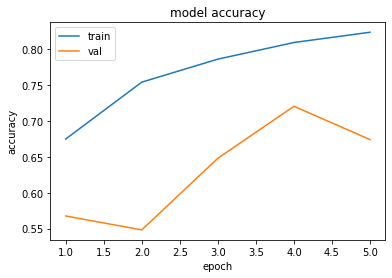

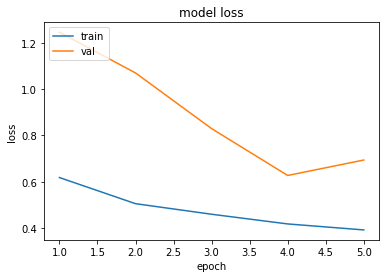

In [183]:
plot_learningcurve(history,5)

In [0]:
import os
test_filenames = os.listdir('/content/test1')

In [0]:
test_df = pd.DataFrame({'filename':test_filenames})

In [190]:
test_generator = test_gen.flow_from_dataframe(test_df,'/content/test1',x_col='filename',y_col=None,class_mode=None,target_size =(img_width,img_height),batch_size =batchsize)

Found 12500 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator)

In [193]:
predict

array([[0.91765213],
       [0.9221974 ],
       [0.7990643 ],
       ...,
       [0.8249481 ],
       [0.9729279 ],
       [0.9827642 ]], dtype=float32)

In [0]:
predict = [1 if y > 0.5 else 0 for y in predict]


In [0]:
test_df['label'] = predict

In [198]:
test_df.tail()

,filename,label
12495,10713.jpg,1
12496,4563.jpg,0
12497,4904.jpg,1
12498,1416.jpg,1
12499,5238.jpg,1


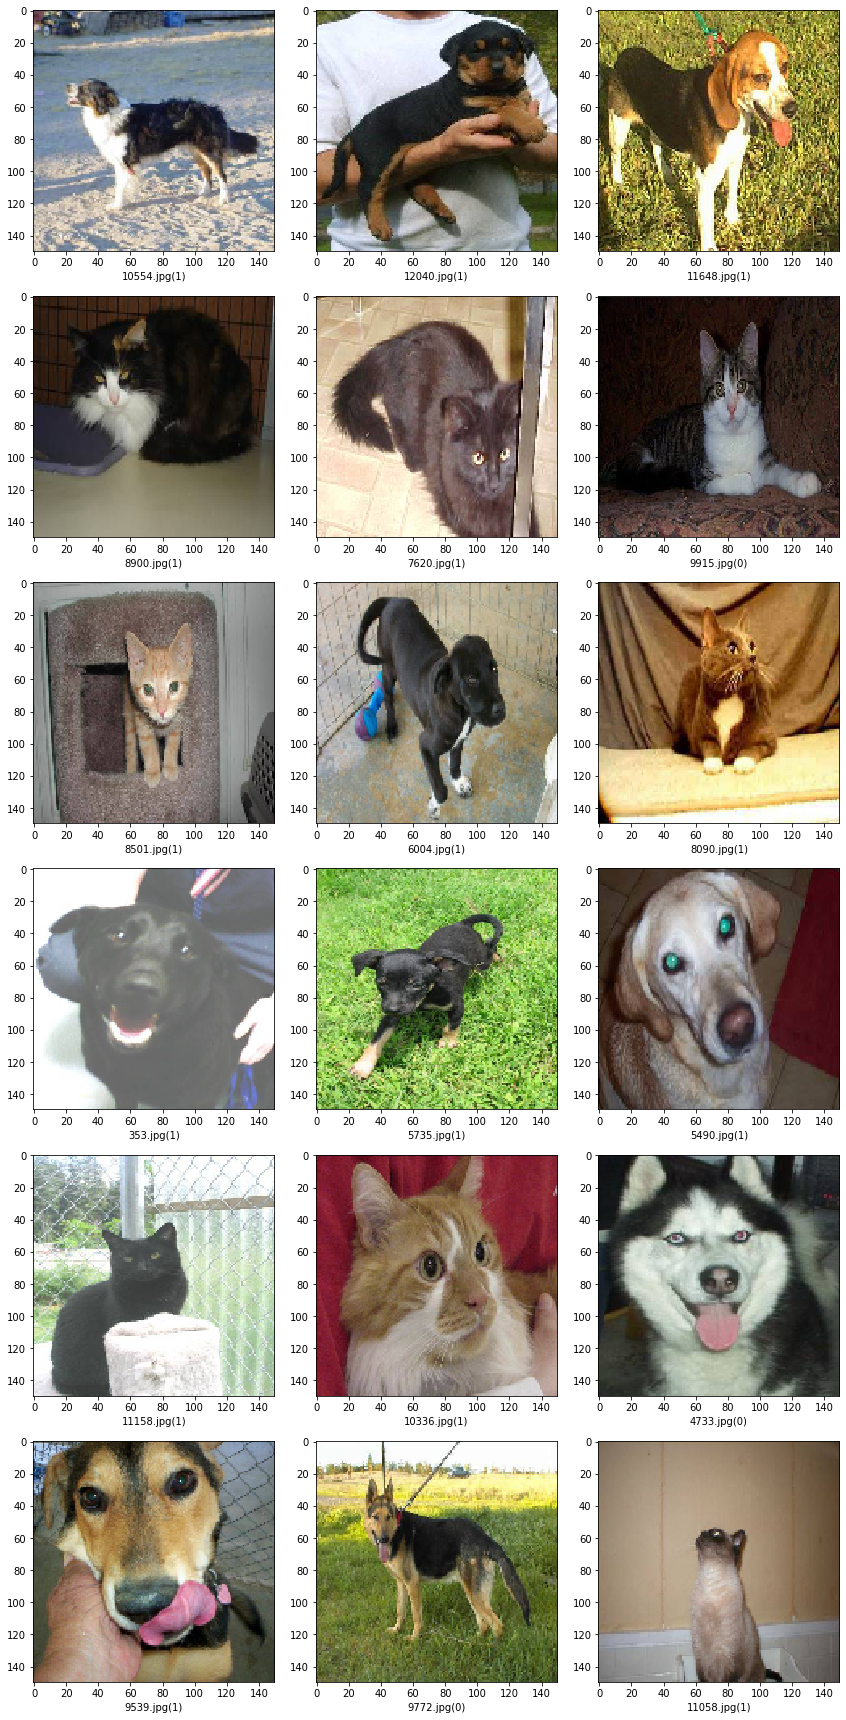

In [206]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    label = row['label']
    img = load_img("/content/test1/"+filename, target_size=(img_width,img_height))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(label) + ')' )
plt.tight_layout()
plt.show()
